In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
data = pd.read_csv(r"abalone.csv")

In [5]:
print(data.head)

<bound method NDFrame.head of      Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
0      M   0.455     0.365   0.095        0.5140          0.2245   
1      M   0.350     0.265   0.090        0.2255          0.0995   
2      F   0.530     0.420   0.135        0.6770          0.2565   
3      M   0.440     0.365   0.125        0.5160          0.2155   
4      I   0.330     0.255   0.080        0.2050          0.0895   
...   ..     ...       ...     ...           ...             ...   
4172   F   0.565     0.450   0.165        0.8870          0.3700   
4173   M   0.590     0.440   0.135        0.9660          0.4390   
4174   M   0.600     0.475   0.205        1.1760          0.5255   
4175   F   0.625     0.485   0.150        1.0945          0.5310   
4176   M   0.710     0.555   0.195        1.9485          0.9455   

      Viscera weight  Shell weight  Rings  
0             0.1010        0.1500     15  
1             0.0485        0.0700      7  
2             0.1415 

In [6]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['Sex'] = label_encoder.fit_transform(data['Sex'])

In [7]:
data.head(5)


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


[0 0 0 ... 1 1 1]
[2 2 0 ... 1 1 1]
[0 2 0 ... 3 3 1]
[0 2 3 ... 1 1 4]
[0 2 3 ... 1 1 5]
[0 2 3 ... 1 1 5]
[3 0 3 ... 1 1 6]
[8 0 3 ... 1 7 6]
[8 0 3 ... 9 1 4]
Best Silhouette Score: 0.5503716674248985
Best number of clusters (k): 2


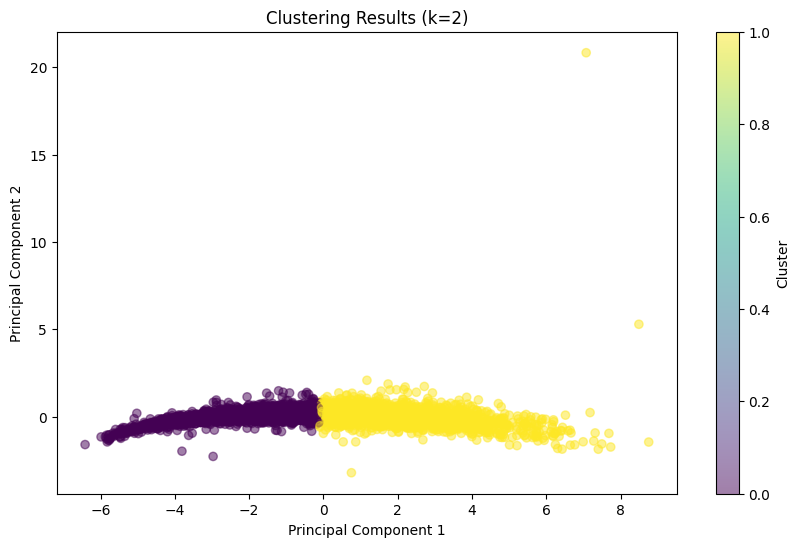

In [8]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

X = data[['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight']]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)  
X_pca = pca.fit_transform(X_scaled)

best_silhouette_score = -1
best_k = -1

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(X_pca, cluster_labels)
    print(cluster_labels)    

    if silhouette_avg > best_silhouette_score:
        best_silhouette_score = silhouette_avg
        best_k = k

print("Best Silhouette Score:", best_silhouette_score)
print("Best number of clusters (k):", best_k)

kmeans_best = KMeans(n_clusters=best_k, random_state=42)
kmeans_best.fit(X_pca)
cluster_labels_best = kmeans_best.labels_

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels_best, cmap='viridis', alpha=0.5)
plt.title(f'Clustering Results (k={best_k})')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()


In [9]:
row_index = 1
input_data = data.iloc[row_index, :]

input_features = input_data[['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight']]

input_features_scaled = scaler.transform([input_features])

input_features_pca = pca.transform(input_features_scaled)

predicted_cluster = kmeans_best.predict(input_features_pca)[0]

print("Actual Cluster Label:", cluster_labels_best[row_index])
print("Predicted Cluster Label:", predicted_cluster)


Actual Cluster Label: 0
Predicted Cluster Label: 0


c:\Users\RAGHUL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
